Original Data:
         age        income  education_years  credit_score
0  44.967142  28769.438869        13.073362    567.100499
1  38.617357  43690.320159        13.682354    593.981896
2  46.476885  44859.282252        15.249154           NaN
3  55.230299  37965.840962        15.161406    711.037027
4  37.658466  47580.714325         7.866992    647.909841

Missing values in credit_score: 25


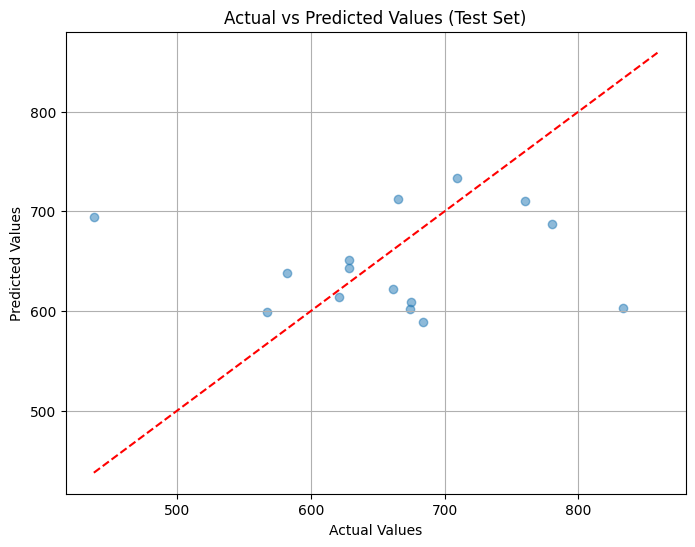


Imputation Report:
Features Used: ['age', 'income', 'education_years']
Test Set Size: 15
Model Type: RandomForestRegressor
Mean Absolute Error: 73.69119732431733
Imputed Count: 25
Imputed Mean: 660.509484065142

First 5 Rows with Imputed Values:
         age        income  education_years  credit_score
0  44.967142  28769.438869        13.073362    567.100499
1  38.617357  43690.320159        13.682354    593.981896
2  46.476885  44859.282252        15.249154    651.611320
3  55.230299  37965.840962        15.161406    711.037027
4  37.658466  47580.714325         7.866992    647.909841


In [1]:
# Question: Predictive Imputation Using Machine Learning
# Description: Use a simple predictive model to impute missing values in a column.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def predictive_imputation(df, target_column, features=None, test_size=0.2, random_state=42):
    """
    Perform predictive imputation using machine learning.
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        target_column (str): Column with missing values to impute
        features (list): List of feature columns (default: all other numeric columns)
        test_size (float): Proportion of data to use for validation
        random_state (int): Random seed for reproducibility
    
    Returns:
        pd.DataFrame: Dataframe with imputed values
        dict: Imputation performance metrics
    """
    
    # Make a copy of the original dataframe
    df_imputed = df.copy()
    
    # If features not specified, use all other numeric columns
    if features is None:
        features = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
                    if col != target_column]
    
    # Separate rows with and without missing values
    missing_mask = df[target_column].isna()
    complete_data = df[~missing_mask]
    incomplete_data = df[missing_mask]
    
    # Split complete data into train/test sets for model validation
    X = complete_data[features]
    y = complete_data[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Train a Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)
    
    # Evaluate model performance
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Impute missing values
    if not incomplete_data.empty:
        predictions = model.predict(incomplete_data[features])
        df_imputed.loc[missing_mask, target_column] = predictions
    
    # Create performance report
    report = {
        'features_used': features,
        'test_set_size': len(X_test),
        'model_type': 'RandomForestRegressor',
        'mean_absolute_error': mae,
        'imputed_count': missing_mask.sum(),
        'imputed_mean': df_imputed.loc[missing_mask, target_column].mean() if missing_mask.sum() > 0 else None
    }
    
    # Plot actual vs predicted for test set
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values (Test Set)')
    plt.grid(True)
    plt.show()
    
    return df_imputed, report

# Example Usage
if __name__ == "__main__":
    # Create sample data with missing values
    np.random.seed(42)
    data = {
        'age': np.random.normal(40, 10, 100),
        'income': np.random.normal(50000, 15000, 100),
        'education_years': np.random.normal(12, 3, 100),
        'credit_score': np.random.normal(650, 100, 100)
    }
    df = pd.DataFrame(data)
    
    # Introduce missing values (20% of credit_score)
    missing_mask = np.random.rand(len(df)) < 0.2
    df.loc[missing_mask, 'credit_score'] = np.nan
    
    print("Original Data:")
    print(df.head())
    print(f"\nMissing values in credit_score: {df['credit_score'].isna().sum()}")
    
    # Perform predictive imputation
    imputed_df, report = predictive_imputation(df, 'credit_score')
    
    print("\nImputation Report:")
    for k, v in report.items():
        print(f"{k.replace('_', ' ').title()}: {v}")
    
    print("\nFirst 5 Rows with Imputed Values:")
    print(imputed_df.head())

